<a href="https://colab.research.google.com/github/niranjana2222/Discovering-Potential-Skin-Cancer-Drugs-/blob/main/fine_tune.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#Get data
cancer = pd.read_csv('/content/descriptors2.csv')
cancer['label'] = 0
cancer.replace([np.inf, -np.inf], np.nan, inplace=True)
cancer = cancer.dropna()
print("Size", cancer.shape)

drugs = pd.read_csv('/content/zinc2.csv')
drugs['label'] = 1
drugs.replace([np.inf, -np.inf], np.nan, inplace=True)
drugs = drugs.dropna()
print("Size", drugs.shape)

data = pd.concat([cancer, drugs])

#Clean data
data = data.dropna()
del data['gmin']
print("Size", data.shape)


Size (1999, 1876)
Size (4738, 1876)
Size (6737, 1875)


             nAcid        ALogP        ALogp2          AMR         apol  \
count  6737.000000  6737.000000  6.737000e+03  6737.000000  6737.000000   
mean      0.086982    -0.169043  1.760278e+00    51.936513    44.590363   
std       0.394256     1.316039  4.447390e+00    33.558605    12.575234   
min       0.000000   -12.994800  2.773339e-32     2.898000     8.231172   
25%       0.000000    -0.925500  1.413008e-01    29.325200    37.196137   
50%       0.000000    -0.142100  6.419214e-01    40.570800    43.324723   
75%       0.000000     0.648300  1.886228e+00    63.713900    50.010688   
max       6.000000     7.416100  1.688648e+02   322.969800   158.877720   

        naAromAtom    nAromBond        nAtom   nHeavyAtom           nH  ...  \
count  6737.000000  6737.000000  6737.000000  6737.000000  6737.000000  ...   
mean      9.671516    10.120677    37.882440    20.839988    17.042452  ...   
std       4.977742     5.308769    11.543749     5.697979     6.927859  ...   
min     

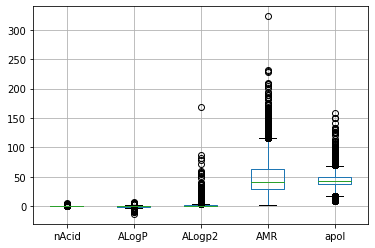

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

###Analyze Data####
print(data.describe())
print(data.head())
print("Size", data.shape)

corr = data.corr().abs()
corr2 = corr.unstack()
print(corr2.sort_values(kind="quicksort", ascending=False))
print("Corr\n", corr2.value_counts())

print((data.max()-data.min()).sort_values(kind="quicksort", ascending=False))
print("Range\n", (data.max()-data.min()).value_counts())

print(data.isnull().sum().sort_values(kind="quicksort", ascending=False))
print("Null\n", data.isnull().sum().value_counts().sort_values(kind="quicksort"))

corr3 = corr2.value_counts().rename_axis('unique_values').to_frame('counts')
print(corr3)

boxplot_nat = data.boxplot(column=['nAcid', 'ALogP', 'ALogp2' , 'AMR' , 'apol'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
labels = data['label']
print(labels)
del data['label']
print(data)
x_train, x_test, y_train, y_test = train_test_split(data, labels, random_state=42)


0       0
1       0
2       0
3       0
4       0
       ..
5323    1
5324    1
5325    1
5326    1
5327    1
Name: label, Length: 6737, dtype: int64
      nAcid   ALogP     ALogp2       AMR       apol  naAromAtom  nAromBond  \
0         0  0.3167   0.100299   93.1538  59.369790           0          0   
1         0 -0.1076   0.011578   12.5551   8.322758           0          0   
2         0 -6.1574  37.913575   71.4075  70.194478           0          0   
3         0  0.1474   0.021727  111.3365  59.298239          12         12   
4         0  2.0343   4.138376  111.6621  52.737102          17         17   
...     ...     ...        ...       ...        ...         ...        ...   
5323      0 -1.2522   1.568005   61.7782  50.799446           6          6   
5324      0  1.7848   3.185511   53.6111  43.480895           6          6   
5325      0  1.7848   3.185511   53.6111  43.480895           6          6   
5326      0  0.4061   0.164917   78.1234  55.182239           5       

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(x_train,y_train)

coconut2 = pd.read_csv('/content/coconut.csv')
coconut2['index'] = np.arange(0, 4898, 1)
coconut2.replace([np.inf, -np.inf], np.nan, inplace=True)
coconut2 = coconut2.dropna()


del coconut2['gmin']
indicies = coconut2['index']
del coconut2['index']
print(coconut2.shape)
print(coconut2)

#df = coconut2.iloc[0].copy(columns=data.columns)

#coconut = pd.DataFrame{}
predictions = random_forest.predict(coconut2)
prob = random_forest.predict_proba(coconut2)

#print(predictions)
#print(predictions.describe())
print(np.unique(predictions, return_counts=True))

print(indicies.shape)
i = 0
count = 0
items = []
for row in predictions:
  if row == 1 and i < indicies.shape[0]:
    print(indicies.iloc[i], " ", prob[i])
    count+=1
    items.append([prob[i][1], indicies.iloc[i]])
    #print(items)
  i+=1

print(count)


(3454, 1874)
      nAcid   ALogP     ALogp2       AMR       apol  naAromAtom  nAromBond  \
8         0  1.4736   2.171497   93.6057  61.349376           0          0   
9         0  0.4844   0.234643   64.2579  41.715446           0          0   
12        0  0.0126   0.000159  118.2887  60.698239          12         12   
13        0  1.2410   1.540081  105.8819  54.667067          12         12   
14        0  0.7946   0.631389  101.5999  51.573481          12         12   
...     ...     ...        ...       ...        ...         ...        ...   
4889      0 -3.4343  11.794416   96.9904  59.867411          12         12   
4890      0 -2.5886   6.700850   95.1221  54.904032          12         12   
4891      0 -4.3626  19.032279   92.0289  61.576583           6          6   
4893      0 -1.9753   3.901810  114.2886  67.677790           6          6   
4896      0 -3.6545  13.355370   74.6402  56.872204           0          0   

      nAtom  nHeavyAtom  nH  ...       P1s       P

In [ ]:
print(items)

[[0.55, 46], [0.51, 98], [0.7, 101], [0.75, 102], [0.74, 119], [0.54, 229], [0.62, 280], [0.52, 558], [0.51, 626], [0.55, 792], [0.53, 829], [0.51, 839], [0.59, 843], [0.51, 852], [0.52, 853], [0.51, 866], [0.54, 883], [0.53, 884], [0.51, 891], [0.53, 895], [0.52, 896], [0.52, 900], [0.53, 902], [0.51, 911], [0.51, 932], [0.52, 933], [0.52, 993], [0.51, 995], [0.52, 1027], [0.54, 1054], [0.55, 1079], [0.51, 1082], [0.51, 1087], [0.53, 1093], [0.56, 1203], [0.6, 1206], [0.66, 1212], [0.59, 1213], [0.54, 1253], [0.55, 1345], [0.62, 1357], [0.55, 1831], [0.59, 1832], [0.54, 1840], [0.59, 1843], [0.59, 1846], [0.58, 1850], [0.64, 1895], [0.75, 1916], [0.62, 1917], [0.62, 1933], [0.52, 1960], [0.53, 1962], [0.53, 1965], [0.52, 1968], [0.56, 1969], [0.52, 1970], [0.53, 1976], [0.53, 1978], [0.65, 1985], [0.65, 1986], [0.63, 1987], [0.64, 1988], [0.63, 1992], [0.72, 1993], [0.57, 1994], [0.64, 1996], [0.78, 2010], [0.52, 2024], [0.6, 2043], [0.55, 2044], [0.51, 2045], [0.54, 2046], [0.57, 204

In [ ]:
items.sort(reverse=True)
print(items)

[[0.93, 2429], [0.88, 2178], [0.86, 2183], [0.85, 4812], [0.84, 2243], [0.83, 2179], [0.81, 2171], [0.8, 3425], [0.79, 2274], [0.78, 3380], [0.78, 2719], [0.78, 2010], [0.77, 2428], [0.77, 2158], [0.76, 2585], [0.76, 2583], [0.76, 2395], [0.75, 2079], [0.75, 1916], [0.75, 102], [0.74, 4685], [0.74, 2823], [0.74, 2565], [0.74, 2253], [0.74, 119], [0.73, 4622], [0.73, 2661], [0.73, 2214], [0.72, 3420], [0.72, 3366], [0.72, 1993], [0.71, 2694], [0.7, 3054], [0.7, 2691], [0.7, 2286], [0.7, 2210], [0.7, 101], [0.69, 3061], [0.69, 2646], [0.69, 2249], [0.68, 3457], [0.68, 2943], [0.68, 2804], [0.68, 2690], [0.67, 4680], [0.67, 3831], [0.67, 2615], [0.67, 2571], [0.67, 2177], [0.66, 4669], [0.66, 4558], [0.66, 2394], [0.66, 2109], [0.66, 1212], [0.65, 4595], [0.65, 2182], [0.65, 1986], [0.65, 1985], [0.64, 3334], [0.64, 2313], [0.64, 2222], [0.64, 1996], [0.64, 1988], [0.64, 1895], [0.63, 4655], [0.63, 2803], [0.63, 2748], [0.63, 2662], [0.63, 2574], [0.63, 2329], [0.63, 2175], [0.63, 2157], 

In [ ]:
count = 0
smi = []
strings = []
index = 0
with open('/content/COCONUT_DB.smi') as f: 
  for line in f.readlines():
    strings.append(line)
    
for mol in items:
  smi.append([strings[mol[1]], mol[0]])

for line in smi:
  print(line[0], " ", line[1])

O=C(CC(=O)CCCCCCCCCCCCCCCC)CCC CNP0002976
   0.93
O=C(O)CCC1(C(=O)C(=O)C(CCC(=O)O)(CCC(=O)O)CCCCCCCC1)CCC(=O)O CNP0002707
   0.88
O=C1NC2=CC=C(O)C=C2OC1O CNP0002718
   0.86
OC1CCC(OC1CNCC=2C=CC=CC2)CC3=NOC(=C3)C(C)(C)C CNP0005424
   0.85
O=C(OCC=1OC=CC1)CC CNP0002784
   0.84
N#CC1=CC=C(N=CC2=CC=C(OCCCCCCCC)C=C2)C=C1 CNP0002708
   0.83
O=C(OCCC(C)C)C(=O)C CNP0002700
   0.81
O=C(NCC)N1CC2OCC(=O)N(CC3=NC=CC=C3)C2C1 CNP0004034
   0.8
O=C(O)C1OC(OC2=CC(O)=C3C(=O)C=C(OC3=C2)C=4C=C(OC)C(O)=C(OC)C4)C(OC5OC(C)C(O)C(O)C5O)C(O)C1O CNP0002816
   0.79
O=C(NC1=CC=C(C=C1)C(O)C2NC(=O)COC2)C3=CC(=NN3C)C CNP0003989
   0.78
O(C)C(OC)C=CCCC CNP0003291
   0.78
N1=C(SC=C1CCC)CCC CNP0002530
   0.78
O=C(CC(=O)CCCCCCCCCCCCCC)CCC CNP0002975
   0.77
O=C(OC)C=1C(O)=CC=CC1CCCCCCCCCC=CCCCCCC CNP0002687
   0.77
S(SC(SC=CC)CC)C CNP0003143
   0.76
S(SC(SC)C)CC CNP0003141
   0.76
OCC1OC2(OC1)CC(C)CCC2C(C)C CNP0002941
   0.76
O1C(=CC=C1C2NCCCC2)C CNP0002602
   0.75
O=C(O)C12CCC(C)C(C)C2C3=CCC4C5(C)CCC(OC6OCC(OC7OC(CO)C(

In [ ]:
good = pd.DataFrame(smi, columns=["SMILE string", "Probability"])
print(good)
print(good.describe())
print(good['Probability'].value_counts())

                                          SMILE string  Probability
0          O=C(CC(=O)CCCCCCCCCCCCCCCC)CCC CNP0002976\n         0.93
1    O=C(O)CCC1(C(=O)C(=O)C(CCC(=O)O)(CCC(=O)O)CCCC...         0.88
2                 O=C1NC2=CC=C(O)C=C2OC1O CNP0002718\n         0.86
3    OC1CCC(OC1CNCC=2C=CC=CC2)CC3=NOC(=C3)C(C)(C)C ...         0.85
4                      O=C(OCC=1OC=CC1)CC CNP0002784\n         0.84
..                                                 ...          ...
210                    N1=CC=NN1C2=COC=C2 CNP0000892\n         0.51
211                  N=1N=CN(C1)C2=COC=C2 CNP0000878\n         0.51
212                  N=1ON=C2C=CC(=NC12)C CNP0000865\n         0.51
213                  N=1OC=C(C1)N2C=NC=C2 CNP0000652\n         0.51
214         O=C(OC1OCCN(CC=2C=CC=CC2)C1)C CNP0000116\n         0.51

[215 rows x 2 columns]
       Probability
count   215.000000
mean      0.606186
std       0.089036
min       0.510000
25%       0.530000
50%       0.580000
75%       0.655000
max     

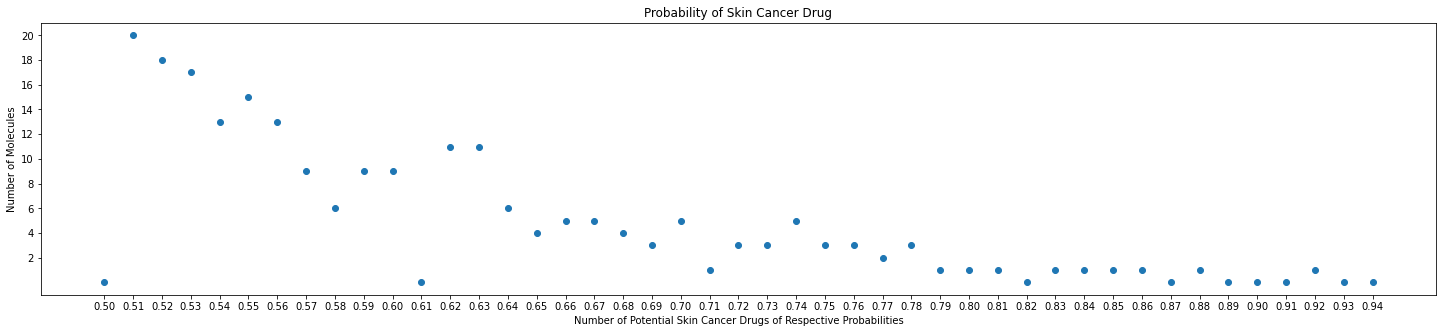

In [24]:
import matplotlib.pyplot as plt
import numpy as np
list2 = [0,20,18,17,13,15,13,9,6,9,9,0,11,11,6,4,5,5,4,3,5,1,3,3,5,3,3,2,3,1,1,1,0,1,1,1,1,0,1,0,0,0,1,0,0]
fig = plt.figure(figsize=(25,5))
items = np.arange(0.5,0.95,0.01)

plt.scatter(items,list2)
plt.title("Probability of Skin Cancer Drug")
plt.ylabel("Number of Molecules")
plt.xlabel("Number of Potential Skin Cancer Drugs of Respective Probabilities")
plt.xticks(np.arange(0.5,0.95,0.01))
plt.yticks(np.arange(2,22,2))
plt.show()



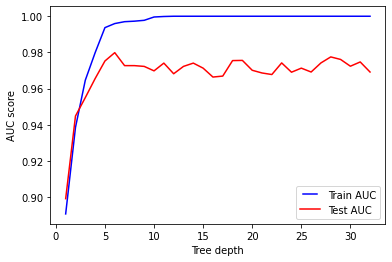

In [ ]:
from sklearn import tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc

#max depth
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
   dt = tree.DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(x_train, y_train)
   train_pred = dt.predict(x_train)
   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
  
   y_pred = dt.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()


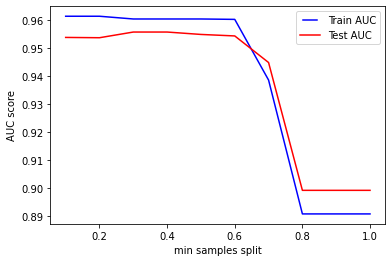

In [ ]:
#min samples split
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
   dt = tree.DecisionTreeClassifier(min_samples_split=min_samples_split)
   dt.fit(x_train, y_train)
   train_pred = dt.predict(x_train)
   
   false_positive_rate, true_positive_rate, thresholds =  roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(x_test)
   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

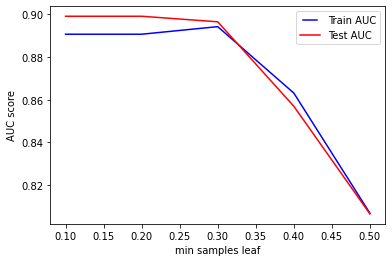

In [ ]:
#min samples leaf
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
   dt = tree.DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
   dt.fit(x_train, y_train)
   train_pred = dt.predict(x_train)
   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(x_test)
   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

43.289721643826724
10.871905237659186


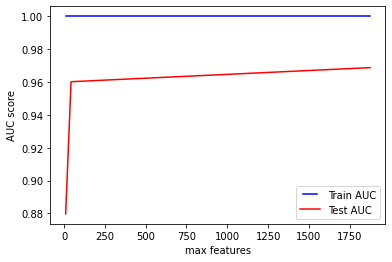

In [ ]:
#max features 
import math
max_features = [1874, int(np.sqrt(1874)), int(math.log2(1874))]
print(np.sqrt(1874))
print(math.log2(1874))
train_results = []
test_results = []

for max_feature in max_features:
   dt = tree.DecisionTreeClassifier(max_features=max_feature)
   dt.fit(x_train, y_train)
   train_pred = dt.predict(x_train)
   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(x_test)
   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

line1, = plt.plot(max_features, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_features, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

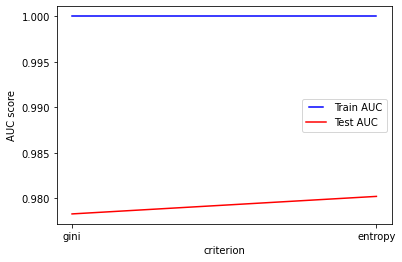

In [ ]:
#criterion 
criterions = ['gini', 'entropy']
train_results = []
test_results = []

for criterion in criterions:
   dt = tree.DecisionTreeClassifier(criterion=criterion)
   dt.fit(x_train, y_train)
   train_pred = dt.predict(x_train)
   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(x_test)
   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

line1, = plt.plot(criterions, train_results, 'b', label="Train AUC")
line2, = plt.plot(criterions, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('criterion')
plt.show()

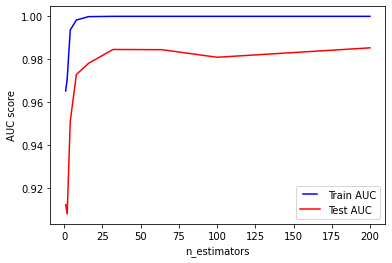

In [ ]:
#n_estimators
from sklearn.metrics import roc_auc_score, roc_curve, auc
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []

for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(x_train, y_train)
   
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_test)
   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

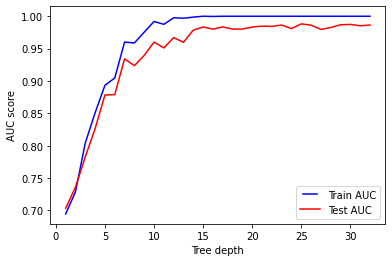

In [ ]:
#max_depth
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_test)
   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

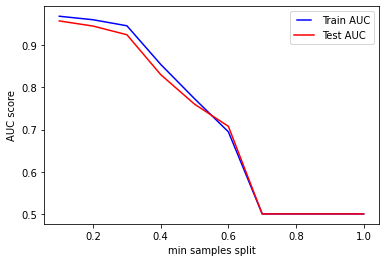

In [ ]:
#min samples split
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
   rf = RandomForestClassifier(min_samples_split=min_samples_split)
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_test)
   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

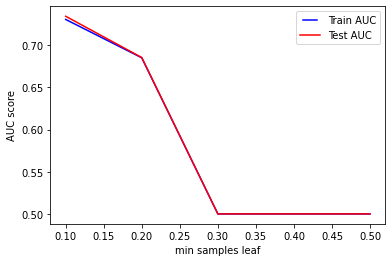

In [ ]:
#min samples leaf
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
   rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_test)
   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

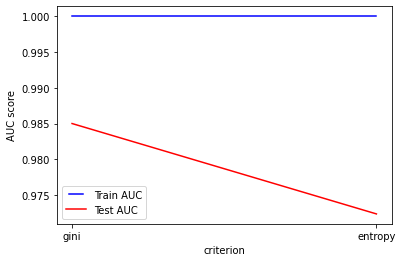

In [ ]:
#criterion 
criterions = ['gini', 'entropy']
train_results = []
test_results = []

for criterion in criterions:
   dt = RandomForestClassifier(criterion=criterion)
   dt.fit(x_train, y_train)
   train_pred = dt.predict(x_train)
   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(x_test)
   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

line1, = plt.plot(criterions, train_results, 'b', label="Train AUC")
line2, = plt.plot(criterions, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('criterion')
plt.show()

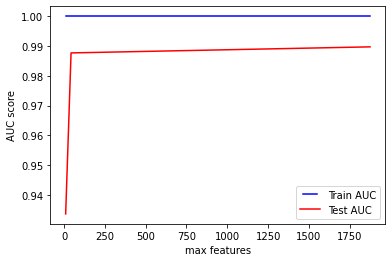

In [ ]:
#max features
#max features 
max_features = [1874, int(np.sqrt(1874)), (int)(math.log2(1874))]
train_results = []
test_results = []

for max_feature in max_features:
   dt = RandomForestClassifier(max_features=max_feature)
   dt.fit(x_train, y_train)
   train_pred = dt.predict(x_train)
   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(x_test)
   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

line1, = plt.plot(max_features, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_features, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()